# IMPORTAR BIBLIOTECAS Y CONJUNTOS DE DATOS

In [1]:
# Importar los paquetes necesarios

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [2]:
from PIL import Image
import os

# Función para verificar la integridad de las imágenes
def check_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                try:
                    img = Image.open(os.path.join(root, file))
                    img.verify() # Verifica que la imagen no esté corrupta
                except Exception as e:
                    print(f"Error al abrir la imagen {file}: {e}")

# Ruta al directorio de imágenes
image_directory = './train'

# Verifica las imágenes antes de comenzar el entrenamiento
check_images(image_directory)

# Continúa con el procesamiento de tu conjunto de datos y el entrenamiento del modelo

In [3]:
os.listdir('./train')

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [4]:
os.listdir(os.path.join('train', 'Mild'))

['0024cdab0c1e.jpg',
 '00cb6555d108.jpg',
 '0124dffecf29.jpg',
 '01b3aed3ed4c.jpg',
 '0369f3efe69b.jpg',
 '03e25101e8e8.jpg',
 '04ac765f91a1.jpg',
 '059bc89df7f4.jpg',
 '05a5183c92d0.jpg',
 '0684311afdfc.jpg',
 '06b71823f9cd.jpg',
 '07929d32b5b3.jpg',
 '07a1c7073982.jpg',
 '086d41d17da8.jpg',
 '09935d72892b.jpg',
 '0a3202889f4d.jpg',
 '0a61bddab956.jpg',
 '0ad7f631dedb.jpg',
 '0d310aba6373.jpg',
 '0dc031c94225.jpg',
 '0dce95217626.jpg',
 '0eb52045349f.jpg',
 '0f495d87656a.jpg',
 '0fb1053285cf.jpg',
 '101b9ebfc720.jpg',
 '107aea0d9289.jpg',
 '10f36b0239fb.jpg',
 '1116271db4ea.jpg',
 '111898ab463d.jpg',
 '12ce6a1a1f31.jpg',
 '12e3f5f2cb17.jpg',
 '13ab8db8c700.jpg',
 '15cc2aef772a.jpg',
 '172df1330a60.jpg',
 '17eff993386f.jpg',
 '18b06f56ab27.jpg',
 '194814669fee.jpg',
 '19722bff5a09.jpg',
 '19e350c7c83c.jpg',
 '1a03a7970337.jpg',
 '1b329a127307.jpg',
 '1bb0ddfe753a.jpg',
 '1c0cf251b426.jpg',
 '1c3a6b4449e9.jpg',
 '1d11794057ff.jpg',
 '1d674e2e32e0.jpg',
 '1df3e03a8f5f.jpg',
 '1e8a1fdee5b

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen con PIL
img_path = './train/Mild/0a61bddab956.jpg'  # Ajusta esta ruta a una de tus imágenes
img = Image.open(img_path)

# Convertir la imagen a un array de numpy
img_array = np.array(img)

# Función para mostrar información sobre los arrays
def print_array_info(arr, name):
    print(f"{name}:")
    print(f"  Shape: {arr.shape}")
    print(f"  Data type: {arr.dtype}")
    print(f"  Min value: {arr.min()}")
    print(f"  Max value: {arr.max()}")
    print(f"  Mean value: {arr.mean()}")
    print()

# Mostrar información sobre ambos arrays
print_array_info(img_array, "Imagen original")


Imagen original:
  Shape: (256, 256, 3)
  Data type: uint8
  Min value: 0
  Max value: 255
  Mean value: 128.2386271158854



In [6]:
# Comprobar el número de imágenes en el conjunto de datos
train = []
label = []

# os.listdir devuelve la lista de archivos de la carpeta, en este caso nombres de clases de imágenes
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  for j in train_class:
    img = os.path.join('train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 3662 



In [7]:
train

['train\\Mild\\0024cdab0c1e.jpg',
 'train\\Mild\\00cb6555d108.jpg',
 'train\\Mild\\0124dffecf29.jpg',
 'train\\Mild\\01b3aed3ed4c.jpg',
 'train\\Mild\\0369f3efe69b.jpg',
 'train\\Mild\\03e25101e8e8.jpg',
 'train\\Mild\\04ac765f91a1.jpg',
 'train\\Mild\\059bc89df7f4.jpg',
 'train\\Mild\\05a5183c92d0.jpg',
 'train\\Mild\\0684311afdfc.jpg',
 'train\\Mild\\06b71823f9cd.jpg',
 'train\\Mild\\07929d32b5b3.jpg',
 'train\\Mild\\07a1c7073982.jpg',
 'train\\Mild\\086d41d17da8.jpg',
 'train\\Mild\\09935d72892b.jpg',
 'train\\Mild\\0a3202889f4d.jpg',
 'train\\Mild\\0a61bddab956.jpg',
 'train\\Mild\\0ad7f631dedb.jpg',
 'train\\Mild\\0d310aba6373.jpg',
 'train\\Mild\\0dc031c94225.jpg',
 'train\\Mild\\0dce95217626.jpg',
 'train\\Mild\\0eb52045349f.jpg',
 'train\\Mild\\0f495d87656a.jpg',
 'train\\Mild\\0fb1053285cf.jpg',
 'train\\Mild\\101b9ebfc720.jpg',
 'train\\Mild\\107aea0d9289.jpg',
 'train\\Mild\\10f36b0239fb.jpg',
 'train\\Mild\\1116271db4ea.jpg',
 'train\\Mild\\111898ab463d.jpg',
 'train\\Mild\

In [8]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

<Axes: xlabel='count'>

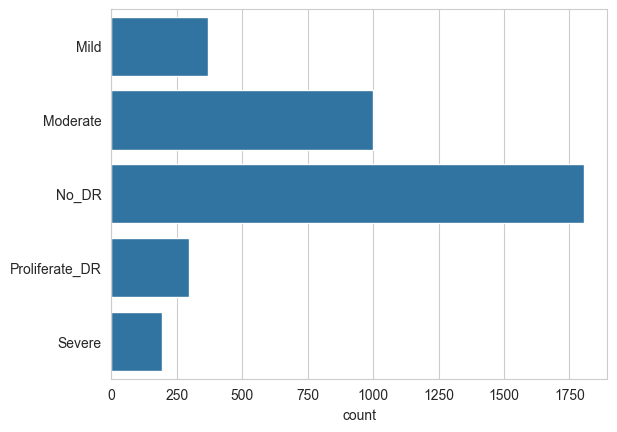

In [9]:
sns.countplot(label)

# EXPLORACIÓN Y VISUALIZACIÓN DE DATOS

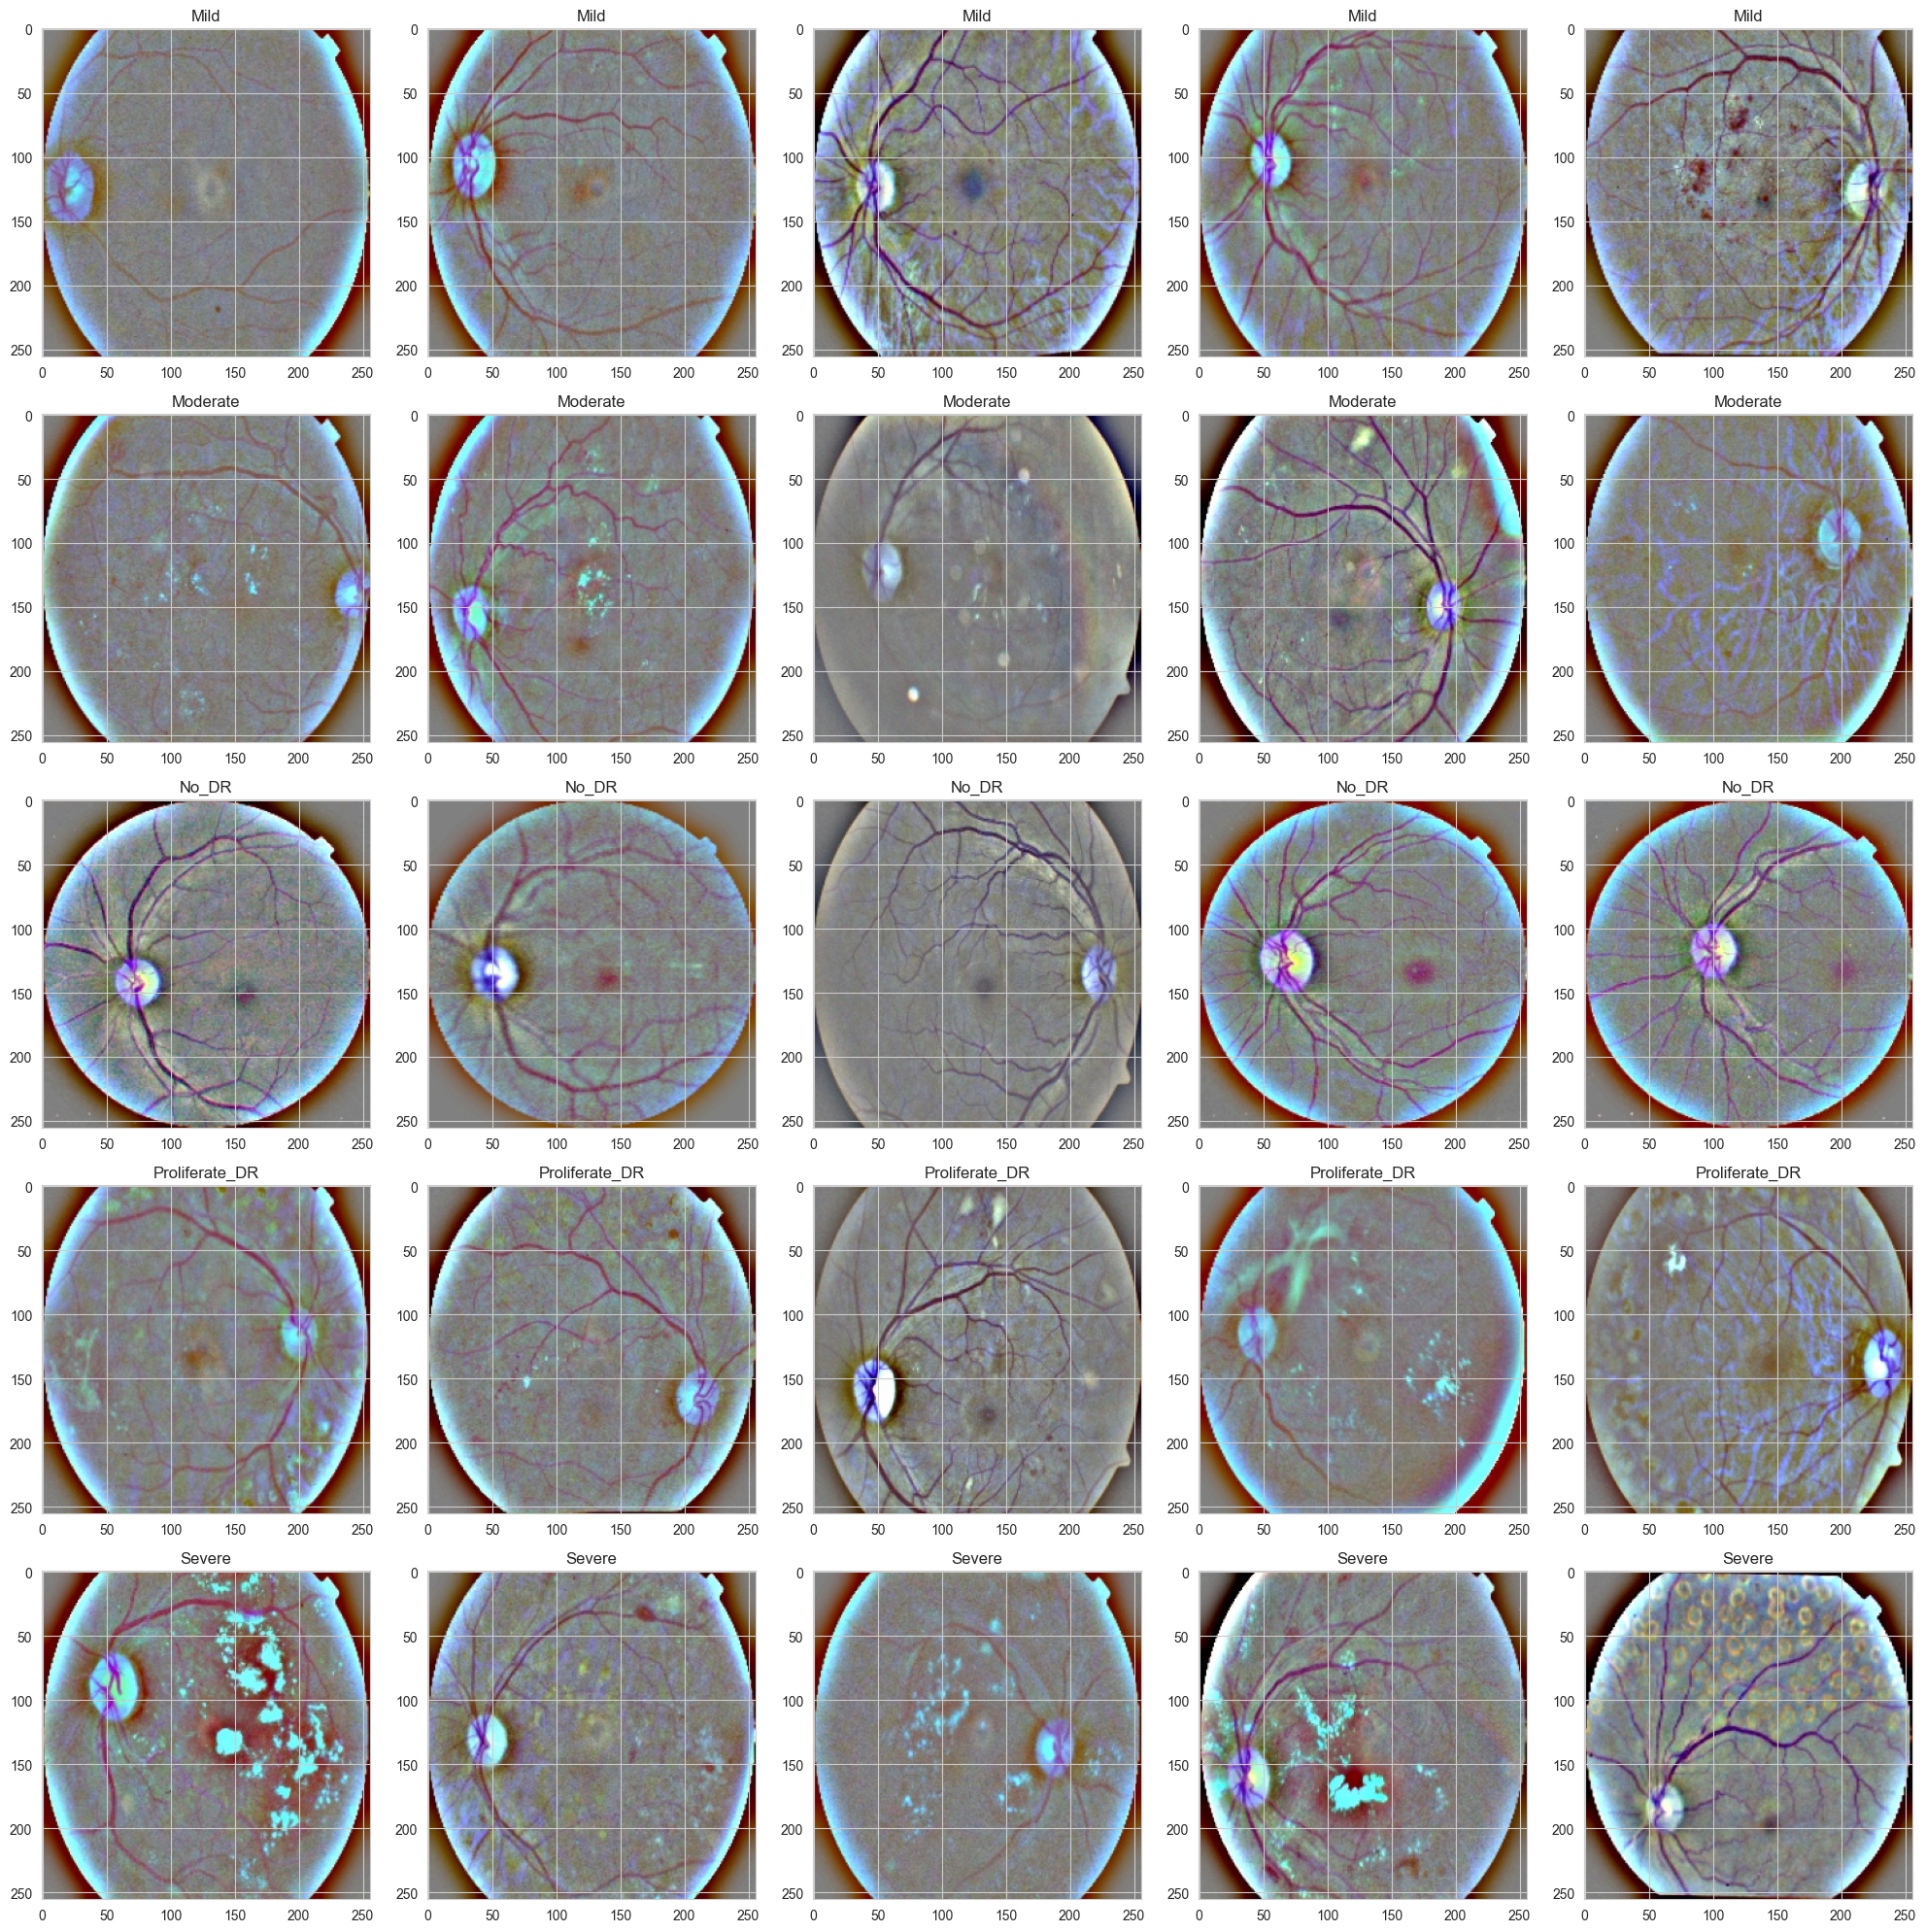

In [10]:
# Visualizar 5 imágenes por cada clase del conjunto de datos
fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('./train'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('train', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


In [11]:
# comprobar el número de imágenes de cada clase en el conjunto de datos de entrenamiento

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [12]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image  Labels
0       train\Mild\0024cdab0c1e.jpg    Mild
1       train\Mild\00cb6555d108.jpg    Mild
2       train\Mild\0124dffecf29.jpg    Mild
3       train\Mild\01b3aed3ed4c.jpg    Mild
4       train\Mild\0369f3efe69b.jpg    Mild
...                             ...     ...
3657  train\Severe\f9156aeffc5e.jpg  Severe
3658  train\Severe\fb61230b99dd.jpg  Severe
3659  train\Severe\fcc6aa6755e6.jpg  Severe
3660  train\Severe\fda39982a810.jpg  Severe
3661  train\Severe\fe0fc67c7980.jpg  Severe

[3662 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

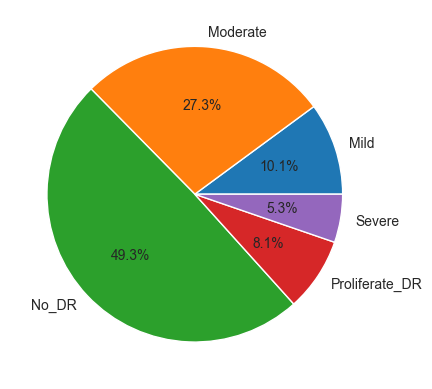

In [13]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

# AUMENTAR LOS DATOS Y CREAR UN GENERADOR DE DATOS

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(retina_df, test_size=0.2, stratify=retina_df['Labels'])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asigna las etiquetas de clase a variables
train_labels = train['Labels']
test_labels = test['Labels']


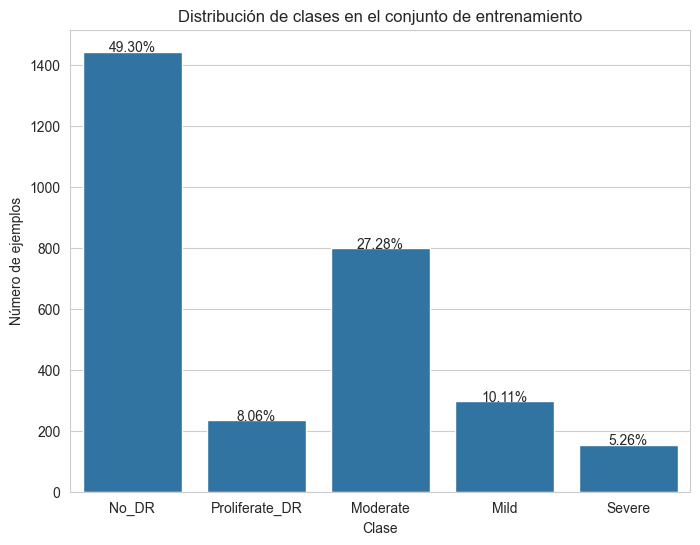

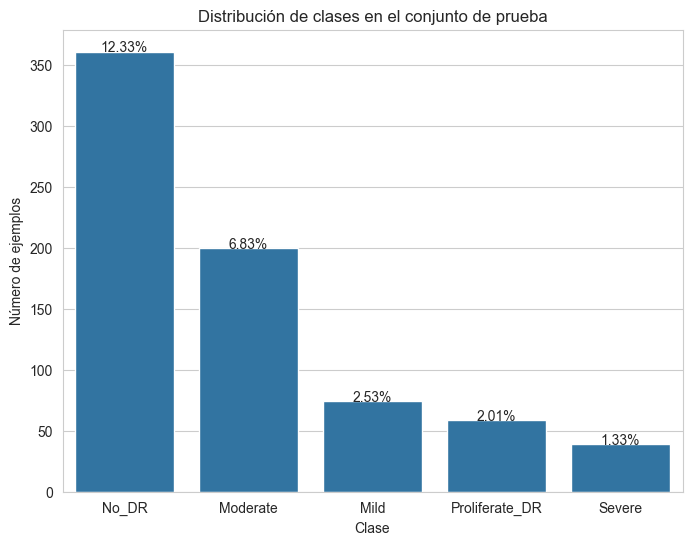

In [16]:
# Agrega porcentajes a los gráficos
def add_percentages(ax):
    for p in ax.patches:
        percentage = f"{p.get_height()/len(train_labels)*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center')

# Crea un gráfico de barras para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=train_labels)
add_percentages(ax)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Número de ejemplos")
plt.show()

# Crea un gráfico de barras para el conjunto de prueba
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=test_labels)
add_percentages(ax)
plt.title("Distribución de clases en el conjunto de prueba")
plt.xlabel("Clase")
plt.ylabel("Número de ejemplos")
plt.show()

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear aumento en tiempo de ejecución en el conjunto de datos de entrenamiento y de prueba.
# Para el generador de datos de entrenamiento, añadimos normalización, ángulo de corte, rango de zoom y volteo horizontal
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2, 1.0],
    rotation_range=40,     # Rotar las imágenes en un rango de 40 grados
    width_shift_range=0.2, # Desplazar horizontalmente las imágenes en un rango de 20%
    height_shift_range=0.2, # Desplazar verticalmente las imágenes en un rango de 20%
    fill_mode='nearest',   # Estrategia de relleno para píxeles nuevos
    validation_split=0.15
)

# Para el generador de datos de prueba, sólo normalizamos los datos.
test_datagen = ImageDataGenerator(rescale=1./255)

# Crear generador de datos para entrenamiento, validación y prueba.
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32
)


Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


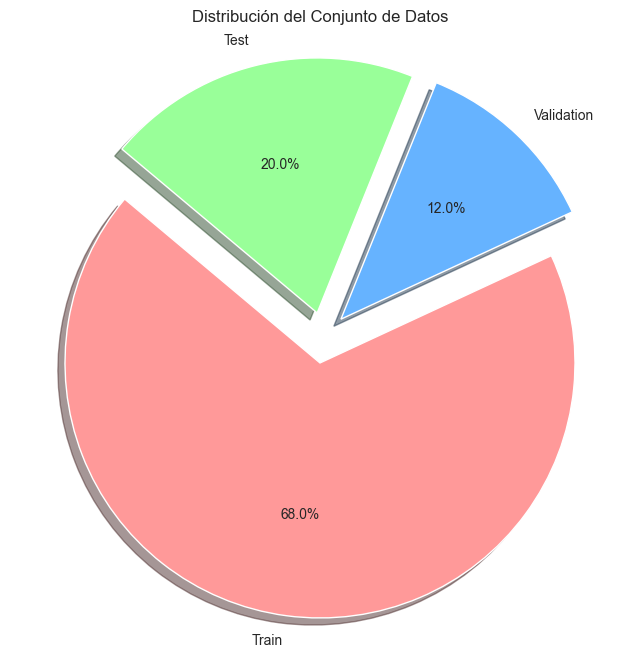

In [18]:
import matplotlib.pyplot as plt

# Cantidad de imágenes en cada conjunto
total_images = 3662
test_images = int(total_images * 0.2)
train_images = total_images - test_images
validation_images = int(train_images * 0.15)
train_images -= validation_images

# Datos para el gráfico de pastel
labels = ['Train', 'Validation', 'Test']
sizes = [train_images, validation_images, test_images]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0.1, 0.1)  # resalta todas las partes

# Creación del gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribución del Conjunto de Datos')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()




# CONSTRUIR UN MODELO DE APRENDIZAJE PROFUNDO BASADO EN RES-BLOCK

In [19]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [20]:
input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage
X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage
X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage
X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model = Model( inputs= X_input, outputs = X, name = 'Modelo_Resnet')

model.summary()

Model: "Modelo_Resnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 128, 128,  │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 128, 128,  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 63, 63,    │      4,160 │ max_pooling2d[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 31, 31,    │          0 │ res_2_conv_a[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 31, 31,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 31, 31,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 31, 31,    │     36,928 │ activation_1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 31, 31,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 31, 31,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 63, 63,    │     16,640 │ max_pooling2d[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 31, 31,    │     16,640 │ activation_2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 31, 31,    │          0 │ res_2_conv_copy[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 31, 31,    │      1,024 │ res_2_conv_c[0][

 Total params: 19,950,213 (76.10 MB)

 Trainable params: 19,907,845 (75.94 MB)

 Non-trainable params: 42,368 (165.50 KB)

# COMPILAR Y ENTRENAR EL MODELO DE APRENDIZAJE PROFUNDO

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy', 'precision'])

In [22]:
#usando la parada temprana para salir del entrenamiento si la pérdida de validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#guardar el mejor modelo con menor pérdida de validación
checkpointer = ModelCheckpoint(filepath="weights.keras", verbose=1, save_best_only=True)

In [23]:
 history = model.fit(
    train_generator, 
    steps_per_epoch = train_generator.n // 32, 
    epochs = 100, 
    validation_data= validation_generator, 
    validation_steps= validation_generator.n // 32, 
    callbacks=[checkpointer , earlystopping])

Epoch 1/100


D:\TESIS\algoritmos\final_23_abril\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3852 - loss: 3.4279 - precision: 0.4213
Epoch 1: val_loss improved from inf to 1.47982, saving model to weights.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 524s 6s/step - accuracy: 0.3861 - loss: 3.4113 - precision: 0.4224 - val_accuracy: 0.1130 - val_loss: 1.4798 - val_precision: 0.0000e+00
Epoch 2/100
 1/77 ━━━━━━━━━━━━━━━━━━━━ 6:06 5s/step - accuracy: 0.5000 - loss: 1.4368 - precision: 0.5294

C:\Users\DarkenxD\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.47982 to 1.42109, saving model to weights.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.5000 - loss: 1.4368 - precision: 0.5294 - val_accuracy: 0.4348 - val_loss: 1.4211 - val_precision: 0.0000e+00
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5275 - loss: 1.2013 - precision: 0.6767
Epoch 3: val_loss did not improve from 1.42109
77/77 ━━━━━━━━━━━━━━━━━━━━ 485s 6s/step - accuracy: 0.5278 - loss: 1.2010 - precision: 0.6768 - val_accuracy: 0.2524 - val_loss: 1.5327 - val_precision: 0.0000e+00
Epoch 4/100
 1/77 ━━━━━━━━━━━━━━━━━━━━ 7:29 6s/step - accuracy: 0.6250 - loss: 1.0804 - precision: 0.8000
Epoch 4: val_loss did not improve from 1.42109
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6250 - loss: 1.0804 - precision: 0.8000 - val_accuracy: 0.3913 - val_loss: 1.4301 - val_precision: 0.0000e+00
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5799 - loss: 1.1206 - precision: 0.7127
Epoch 5: val_los

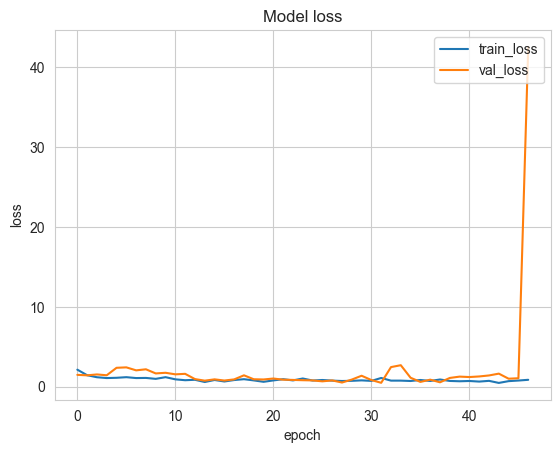

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


#  EVALUAR EL RENDIMIENTO DEL MODELO ENTRENADO

In [25]:
model.load_weights("weights.keras")

In [26]:
# Evaluar el rendimiento del modelo
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7287 - loss: 0.7009 - precision: 0.8211
Accuracy Test : 0.734375


In [27]:
# Asignación de nombres de etiquetas a los índices correspondientes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [28]:
# Cargando imágenes y sus predicciones 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━

In [29]:
# Obtener la precisión de la prueba 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.73806275579809


In [30]:
# Imprimir el informe de clasificación
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.37      0.68      0.48        74
      Moderate       0.66      0.68      0.67       200
         No_DR       0.93      0.97      0.95       361
Proliferate_DR       0.33      0.05      0.09        59
        Severe       0.57      0.10      0.17        39

      accuracy                           0.74       733
     macro avg       0.57      0.49      0.47       733
  weighted avg       0.73      0.74      0.71       733



Text(0.5, 1.0, 'Confusion_matrix')

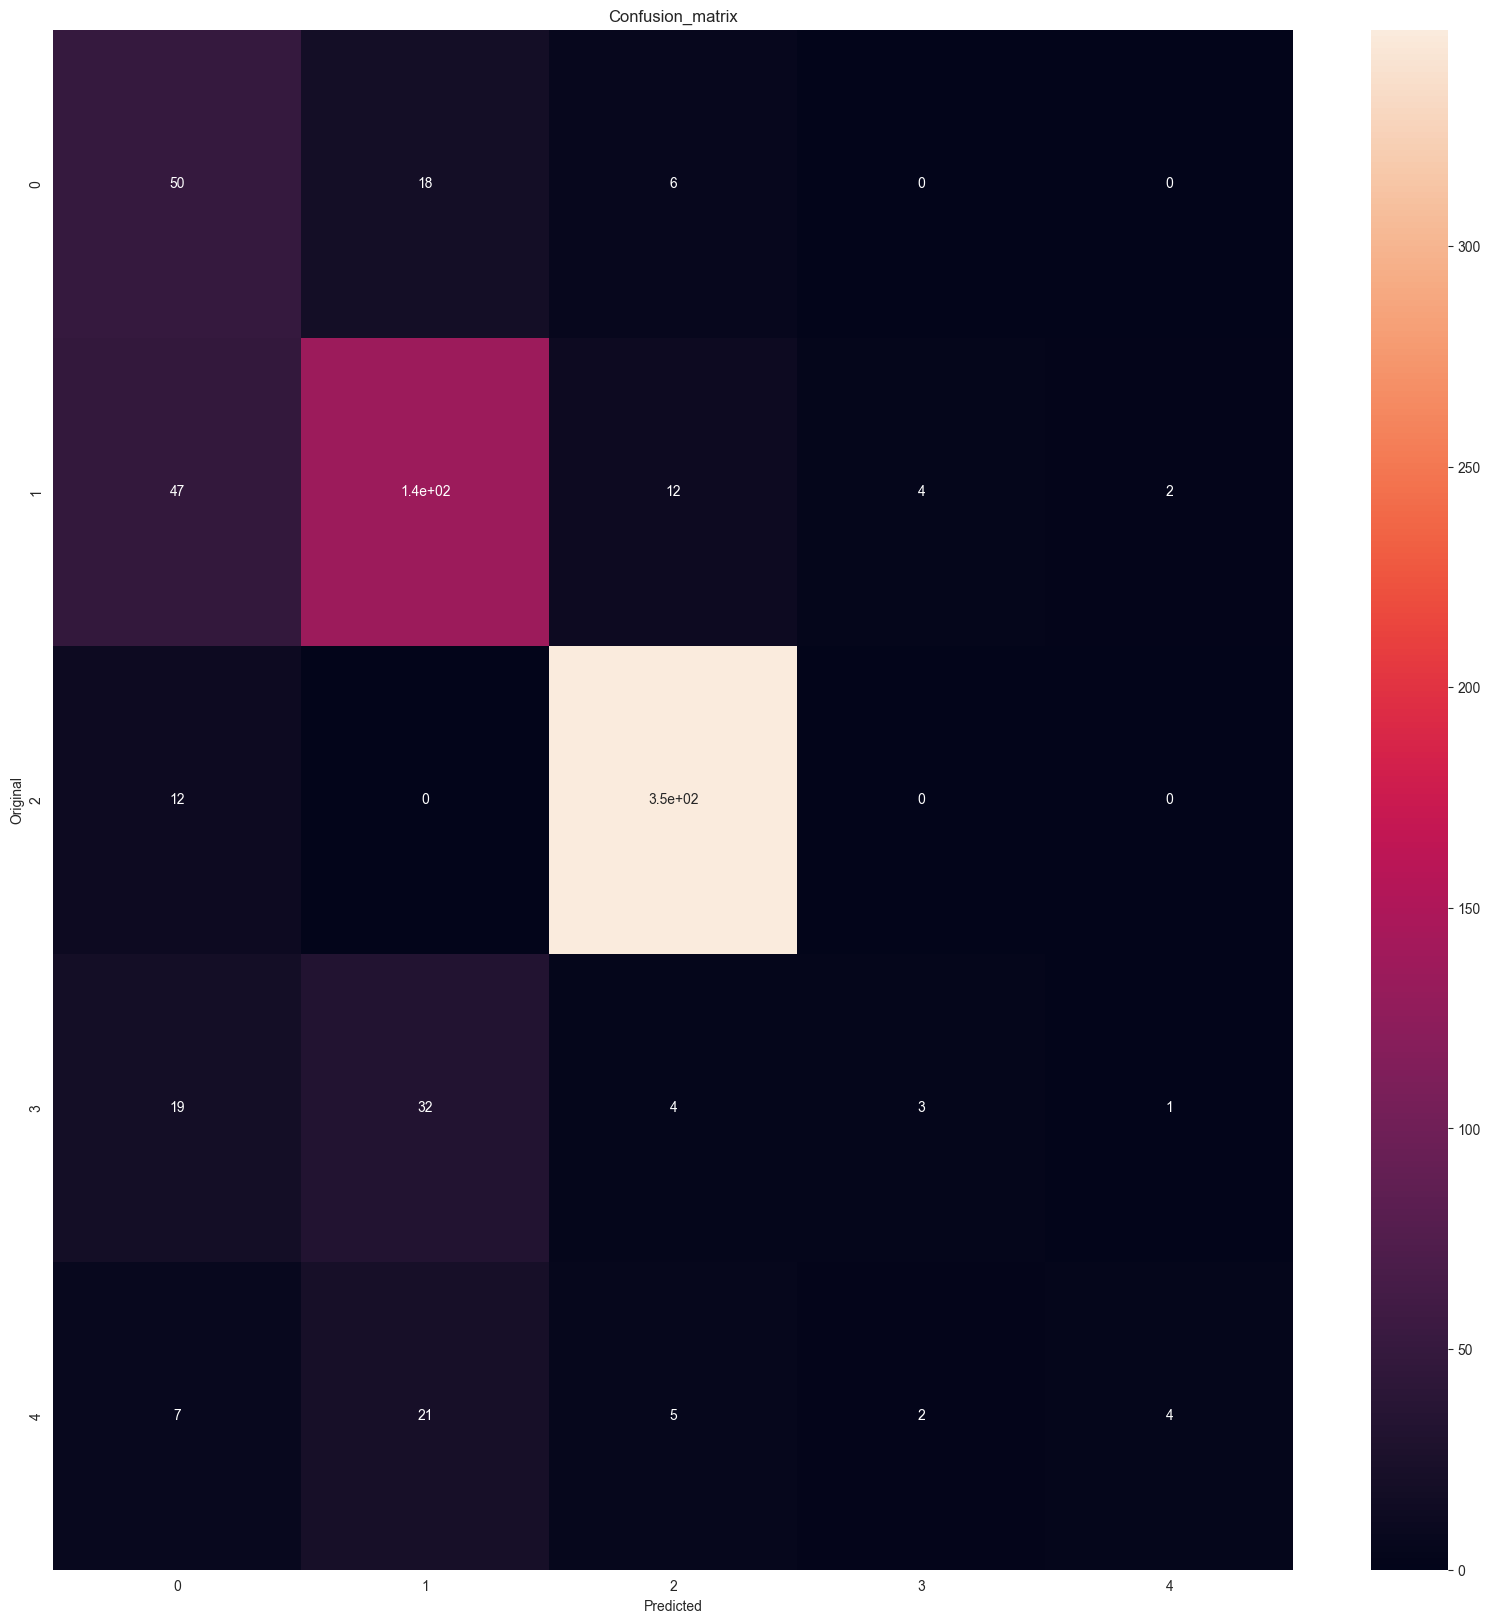

In [31]:
# trazar la matriz de confusión
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
